In [1]:
# Import library yang diperlukan
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# 1. Load Dataset
print("Loading MNIST dataset...")
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Loading MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 18s 2us/step


In [3]:
# 2. Pra-pengolahan Data
def preprocess_data(X_train, X_test, y_train, y_test, use_pca=False, n_components=200):
    print("\nPra-pengolahan Data:")
    print("- Normalisasi")
    print("- Reshape")
    if use_pca:
        print("- PCA untuk reduksi dimensi")
    
    # Reshape data
    X_train = X_train.reshape(X_train.shape[0], 28*28)
    X_test = X_test.reshape(X_test.shape[0], 28*28)
    
    # Normalisasi menggunakan StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Opsi PCA untuk reduksi dimensi
    if use_pca:
        pca = PCA(n_components=n_components)
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)
        print(f"- Variance explained: {np.sum(pca.explained_variance_ratio_):.4f}")
    
    # One-hot encoding untuk label
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    
    return X_train, X_test, y_train, y_test

In [4]:
# 3. Membuat Model ANN
def create_model(input_shape, activation='relu', architecture=[512, 256, 128]):
    print("\nArsitektur Model:")
    print(f"- Input shape: {input_shape}")
    print(f"- Hidden layers: {architecture}")
    print(f"- Activation function: {activation}")
    
    model = Sequential()
    
    # Input layer
    model.add(Dense(architecture[0], activation=activation, input_shape=input_shape))
    model.add(Dropout(0.3))
    
    # Hidden layers
    for units in architecture[1:]:
        model.add(Dense(units, activation=activation))
        model.add(Dropout(0.3))
    
    # Output layer
    model.add(Dense(10, activation='softmax'))
    
    return model

In [5]:
# 4. Training dan Evaluasi
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    # Kompilasi model
    model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    
    print("\nTraining Model...")
    # Training
    history = model.fit(X_train, y_train,
                        batch_size=128,
                        epochs=20,
                        validation_split=0.2,
                        verbose=1)
    
    # Evaluasi
    print("\nEvaluasi Model:")
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test accuracy: {test_accuracy:.4f}")
    
    # Confusion Matrix
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np. argmax(y_test, axis=1)
    cm = confusion_matrix(y_test_classes, y_pred_classes)
    
    return test_accuracy, cm

In [6]:
# 5. Visualisasi hasil
def plot_confusion_matrix(cm):
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


Pra-pengolahan Data:
- Normalisasi
- Reshape
- PCA untuk reduksi dimensi
- Variance explained: 0.8674

Arsitektur Model:
- Input shape: (200,)
- Hidden layers: [512, 256, 128]
- Activation function: relu

Training Model...
Epoch 1/20


c:\Users\Firefly\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7352 - loss: 0.8449 - val_accuracy: 0.9492 - val_loss: 0.1774
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9282 - loss: 0.2519 - val_accuracy: 0.9595 - val_loss: 0.1393
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9487 - loss: 0.1839 - val_accuracy: 0.9657 - val_loss: 0.1217
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9553 - loss: 0.1549 - val_accuracy: 0.9690 - val_loss: 0.1256
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9629 - loss: 0.1325 - val_accuracy: 0.9697 - val_loss: 0.1150
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9652 - loss: 0.1264 - val_accuracy: 0.9718 - val_loss: 0.1042
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9691 - loss: 0.1089 - val_accuracy: 0.9733 - val_loss: 0.0982
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9735 - loss: 0.0923 - val_accuracy: 0.9732 - val_

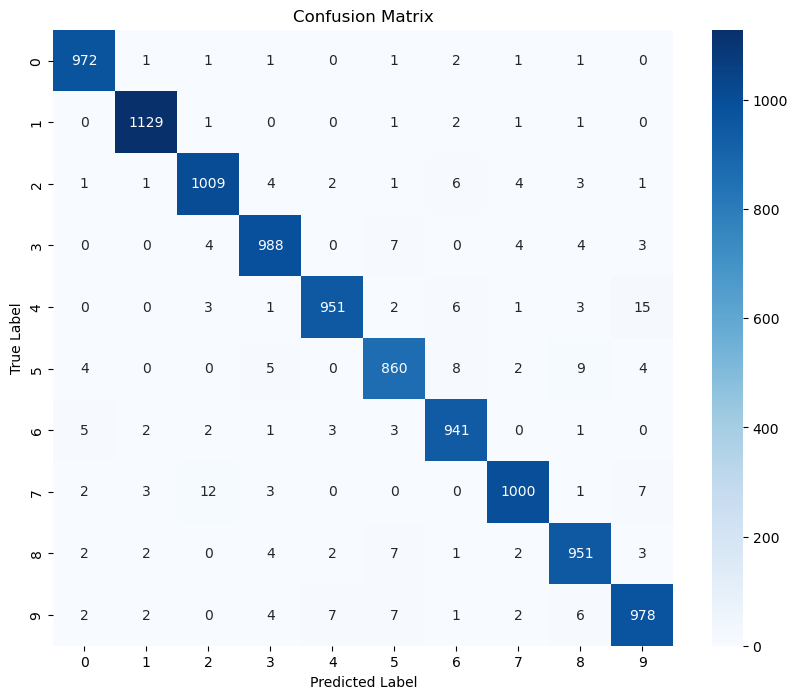

In [7]:
# Eksplorasi
use_pca = True
n_components = 200
input_shape = (n_components,) if use_pca else (784,)
X_train, X_test, y_train, y_test = preprocess_data(X_train, X_test, y_train, y_test, use_pca, n_components)
model = create_model(input_shape)
test_accuracy, cm = train_and_evaluate(model, X_train, X_test, y_train, y_test)
plot_confusion_matrix(cm)